In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    fill_mode="nearest"
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    seed=123,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    seed=123,
    batch_size=batch_size,
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

def Model():
    cham_dim=-1
    model = Sequential()
    model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3),padding="same"))
    model.add(MaxPooling2D(3,3))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Conv2D(128, (3, 3),activation="relu",padding="same"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(MaxPooling2D(3,3))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation="relu"))
    model.add(BatchNormalization(axis=cham_dim))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation="softmax"))

    model.summary()

    return model

In [3]:
model12 = Model()
model12.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["acc"])
history = model12.fit_generator(
    train,
    steps_per_epoch=250,
    epochs=12,
    validation_data=val,
    validation_steps=63
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 42, 42, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 42, 42, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 42, 42, 128)      5

C:\Users\MTG\AppData\Local\Temp\ipykernel_14712\1222323732.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model12.fit_generator(


Epoch 1/12
250/250 [==============================] - 54s 174ms/step - loss: 1.1906 - acc: 0.6520 - val_loss: 13.3507 - val_acc: 0.1000
Epoch 2/12
250/250 [==============================] - 40s 160ms/step - loss: 0.5778 - acc: 0.8073 - val_loss: 7.6407 - val_acc: 0.1725
Epoch 3/12
250/250 [==============================] - 40s 160ms/step - loss: 0.4661 - acc: 0.8434 - val_loss: 4.0337 - val_acc: 0.4325
Epoch 4/12
250/250 [==============================] - 44s 175ms/step - loss: 0.3798 - acc: 0.8700 - val_loss: 1.5893 - val_acc: 0.6690
Epoch 5/12
250/250 [==============================] - 50s 198ms/step - loss: 0.3340 - acc: 0.8860 - val_loss: 0.6365 - val_acc: 0.7805
Epoch 6/12
250/250 [==============================] - 55s 221ms/step - loss: 0.2978 - acc: 0.8936 - val_loss: 2.7978 - val_acc: 0.4385
Epoch 7/12
250/250 [==============================] - 48s 192ms/step - loss: 0.2590 - acc: 0.9096 - val_loss: 1.9599 - val_acc: 0.6420
Epoch 8/12
250/250 [==============================] - 

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model12.predict_generator(test,32)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

C:\Users\MTG\AppData\Local\Temp\ipykernel_14712\1182761131.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model12.predict_generator(test,32)


1000

In [5]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

In [6]:
cm


array([[ 3,  8,  8,  6, 15,  8, 24,  9, 10,  9],
       [ 5, 14,  8, 10, 10,  6, 26,  3, 11,  7],
       [ 7,  6, 11,  6, 17,  6, 21,  5, 15,  6],
       [ 4,  6,  5,  5,  7,  7, 27, 15, 14, 10],
       [12, 10,  9,  5,  8,  3, 25,  4, 15,  9],
       [ 4,  3,  8,  7, 13,  3, 28,  4, 16, 14],
       [ 7,  4, 11,  7,  7,  7, 25, 10, 12, 10],
       [ 3, 10, 10,  8, 13,  5, 19,  7, 13, 12],
       [ 6, 10,  9,  4, 14,  7, 20,  6, 13, 11],
       [ 6,  7, 10,  8, 21,  4, 26,  5,  6,  7]], dtype=int64)

In [7]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 3) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot      0.053     0.030     0.038       100
                        Tomato___Early_blight      0.179     0.140     0.157       100
                         Tomato___Late_blight      0.124     0.110     0.116       100
                           Tomato___Leaf_Mold      0.076     0.050     0.060       100
                  Tomato___Septoria_leaf_spot      0.064     0.080     0.071       100
Tomato___Spider_mites Two-spotted_spider_mite      0.054     0.030     0.038       100
                         Tomato___Target_Spot      0.104     0.250     0.147       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus      0.103     0.070     0.083       100
                 Tomato___Tomato_mosaic_virus      0.104     0.130     0.116       100
                             Tomato___healthy      0.074     0.070     0.072      

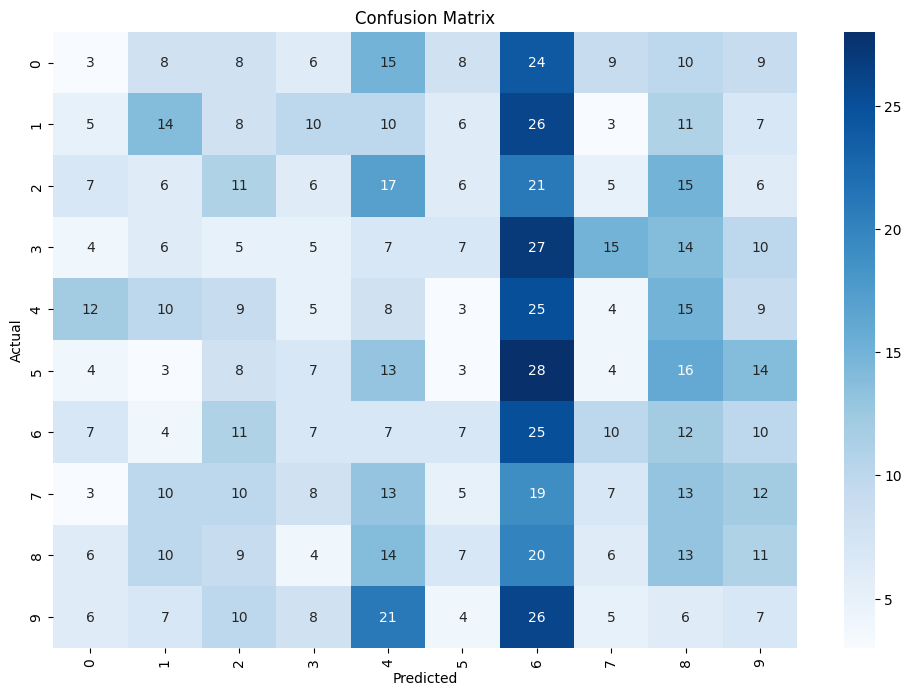

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
class_count = len(list(test.class_indices.keys()))

plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.xticks(np.arange(class_count)+.5,rotation=90)
plt.yticks(np.arange(class_count)+.5,rotation=90)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()